## Coding a KNN classifier

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

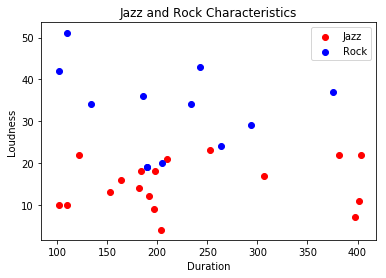

In [129]:
#Create some dummy data to play with.
music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [130]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

In [131]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[ 0.4  0.6]]


## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [132]:
X

,loudness,duration
0,18,184
1,34,134
2,43,243
3,36,186
4,22,122
5,9,197
6,29,294
7,22,382
8,10,102
9,24,264


In [133]:
Y

0     1
1     0
2     0
3     0
4     1
5     1
6     0
7     1
8     1
9     0
10    0
11    1
12    1
13    0
14    1
15    1
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    0
25    0
26    1
27    1
28    0
29    0
Name: jazz, dtype: int64

In [134]:
test = [[140, 30]]


test[0]

[140, 30]

In [135]:
#Practice writing Euclidean Distance function.

def euclidean_dist(test, train):
    #test and train are n x m arrays
    distances = []
    for i in range(len(test)):
        distance = np.sqrt(np.sum(np.square(test[i] - train), axis=1))
        distances.append(distance)
    return distances

train = X
#X is 30 x 2
test = [[140, 30], [90,30]]
Y_test = [0]
#test is 2 x 2

euclidean_dist(test, train)

[0     196.468827
 1     148.499158
 2     234.047004
 3     187.488666
 4     149.626201
 5     212.249853
 6     286.386103
 7     371.251936
 8     148.606864
 9     261.174271
 10    212.190952
 11    152.643375
 12    303.080847
 13    119.670381
 14    390.356248
 15    176.799321
 16    200.601595
 17    206.465493
 18    215.779981
 19    391.219887
 20    182.570534
 21    207.624661
 22    220.843836
 23    251.829307
 24    229.895628
 25    200.601595
 26    197.433533
 27    392.787474
 28    361.005540
 29    121.605921
 dtype: float64, 0     170.000000
 1     118.118584
 2     218.123818
 3     165.081798
 4     114.402797
 5     185.607112
 6     270.955716
 7     358.508019
 8     107.628992
 9     243.129595
 10    188.480768
 11    113.137085
 12    286.457676
 13     89.000000
 14    376.268521
 15    145.113748
 16    175.045708
 17    179.799889
 18    192.771886
 19    379.147728
 20    153.075145
 21    182.778555
 22    194.092761
 23    232.847590
 24    211.5

In [136]:
def get_neighbor(X_train, X_test, Y_train):
    neighbors = np.argsort(euclidean_dist(test, train))
    index = [item[0] for item in neighbors]
    return(Y_train[index])

print(get_neighbor(train, test, Y))
    
def knn_class(X_train, X_test, Y_train):
    #Here's where I need to polish it up.
    #I want to get the object returned by get_neighbor into a shape
    #that I can append to a dataframe storing the test data points.
    #That is, where row0 is test index 0, test 0 column 1, test 0 column 2, 13, 0, etc.
    predictions = []
    predictions.append(get_neighbor(X_train, X_test, Y_train))
    return(predictions)

knn_class(train, test, Y)

13    0
29    0
Name: jazz, dtype: int64


[13    0
 29    0
 Name: jazz, dtype: int64]

In [137]:
X_train = X[:29]
Y_train = Y[:29]

X_test = X[29:]
Y_test = Y[29:]

#But not with dataframes...
knn_class(X_train, X_test, Y_train)

[13    0.0
 29    NaN
 Name: jazz, dtype: float64]